In [1]:
#housing price prediction using advance regression techniques

In [2]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso
from sklearn.model_selection import cross_val_score

In [7]:
train_full=pd.read_csv("housing_train.csv")

In [24]:
xtest=pd.read_csv("housing_test.csv")

In [10]:
train_full.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
train_full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
train_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

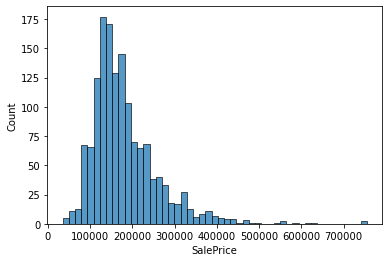

In [16]:
sns.histplot(x='SalePrice', data=train_full)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

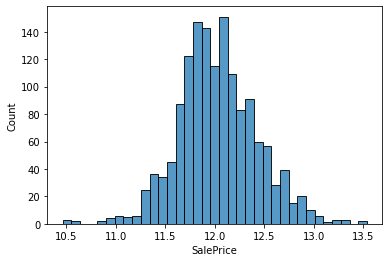

In [17]:
train_full['SalePrice'] = np.log1p(train_full['SalePrice'])
sns.histplot(x='SalePrice', data=train_full)

<AxesSubplot:>

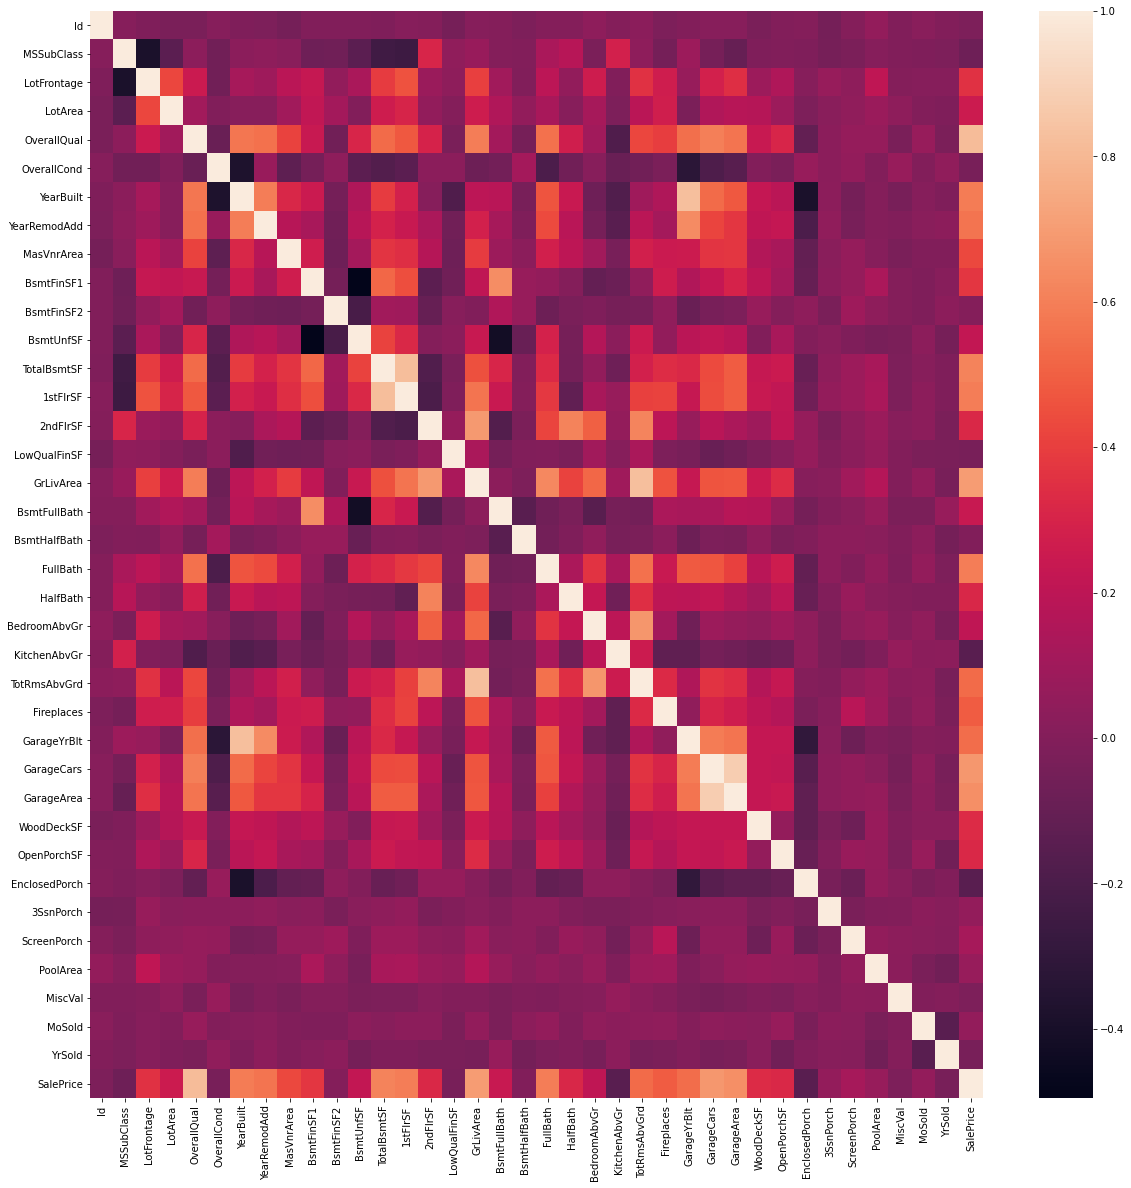

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
cor = train_full.corr()
sns.heatmap(cor)

In [19]:
missing = train_full.isnull().sum() / train_full.shape[0]


In [20]:
missing.drop(missing[missing == 0].index).sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [22]:
# columns that need NA to be converted to a label 'None'
none_col = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

# numeric and categorical columns 
cat_col = train_full.loc[:,train_full.dtypes == object].columns
num_col = train_full.loc[:, (train_full.dtypes != object) & (train_full.columns != 'SalePrice') ].columns

In [25]:
dsets = [train_full, xtest]
for dset in dsets:
    for col in none_col:
        dset[col] = dset[col].fillna('None')
    for col in cat_col:
        dset[col] = dset[col].fillna(dset[col].mode()[0])
        
# impute missing values and standardize the columns 
for dset in dsets:
    for col in num_col:
        dset[col] = dset[col].fillna(dset[col].mean())
        dset[col] = (dset[col] - dset[col].mean())/ dset[col].std()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

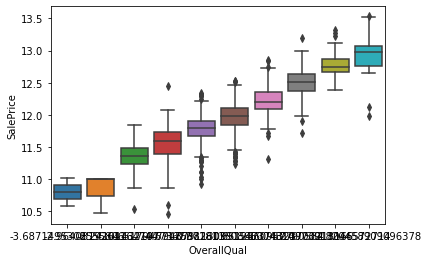

In [26]:
sns.boxplot(x='OverallQual', y = 'SalePrice', data=train_full)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

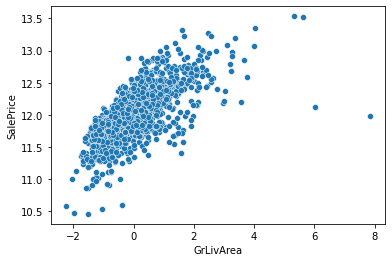

In [27]:
sns.scatterplot(x='GrLivArea', y = 'SalePrice', data=train_full)

In [28]:
y_train = train_full['SalePrice']
X = train_full.drop('SalePrice', axis = 1)

In [29]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train_ohe = pd.DataFrame(ohe.fit_transform(X[cat_col]))
x_test_ohe = pd.DataFrame(ohe.transform(xtest[cat_col]))

In [30]:
features = [x_train_ohe, x_test_ohe]
for dset in features:
    dset.columns = ohe.get_feature_names()
x_train_ohe.index = X.index
x_test_ohe.index = xtest.index

In [31]:
num_xtrain = X.drop(cat_col, axis = 1)
num_xtest = xtest.drop(cat_col, axis = 1)

x_train = pd.concat([x_train_ohe, num_xtrain], axis = 1)

In [32]:
ridge = RidgeCV(alphas = np.arange(1,5,0.25)).fit(x_train, y_train)

In [33]:
ridge.score(x_train, y_train)

0.9274161754789372

In [34]:
ridge.alpha_

4.75

In [35]:
lasso = LassoCV().fit(x_train, y_train)

In [36]:
lasso.score(x_train, y_train)

0.9236172615841535

In [37]:
lasso.alpha_

0.0006112396602269071